In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# Prediction Models (Numerical) and Important Features

In [2]:
df = pd.read_csv('data/new_health.csv')
df = df.drop(columns=['Unnamed: 0'], axis = 1)
df['suicide_risk'] = (df['suicide_risk']*6).round()
df

,RELIG_SERVICES_12month,RELIG_IMPORTANT,RELIG_influ_decision,friend_SHARE_REL,Tabacco_Flag,Alcohol_Flag,Marijunana_Flag,Marijuana_Only_Flag,Cocaine_Flag,Crack_Flag,...,lifetime_mde,pst_yr_mde,age,HEALTH,IRSEX,IRMARIT,EDUCCAT2,NEWRACE2,EMPSTATY,suicide_risk
0,0.6,0.333333,0.333333,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.00,0.00,0.0,0.000000,0.666667,0.000000,0.000000,0.0
1,0.4,0.666667,0.666667,1.000000,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.00,0.25,1.0,0.333333,0.666667,0.166667,0.000000,0.0
2,0.2,0.333333,0.333333,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.00,0.75,1.0,0.000000,0.000000,0.166667,0.333333,0.0
3,0.6,0.000000,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.75,0.75,1.0,0.666667,0.333333,0.166667,0.666667,0.0
4,0.4,0.000000,0.000000,0.333333,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.00,0.00,1.0,0.000000,0.666667,0.166667,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189290,0.8,0.000000,0.333333,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.00,0.00,1.0,0.000000,0.333333,0.166667,0.000000,0.0
189291,0.4,1.000000,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.50,0.75,1.0,0.666667,0.333333,0.166667,0.333333,3.0
189292,0.8,0.000000,0.000000,0.666667,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.50,0.25,0.0,0.333333,1.000000,0.166667,0.000000,0.0
189293,0.6,0.333333,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,1.0,0.000000,0.666667,0.166667,1.000000,0.0


In [3]:
df.columns

Index(['RELIG_SERVICES_12month', 'RELIG_IMPORTANT', 'RELIG_influ_decision',
       'friend_SHARE_REL', 'Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag',
       'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag',
       'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'Meth_Flag', 'Sedatives Flag',
       'Any_Drug_Flag', 'Drug_Not_Marijunana', 'Ever_Steal_50',
       'Sell_Illegal_Drugs', 'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year',
       'inpatient', 'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'psych_distress_month', 'psych_distress_yr', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'age', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
       'NEWRACE2', 'EMPSTATY', 'suicide_risk'],
      dtype='object')

In [4]:
df['suicide_risk'].value_counts()

0.0    178945
1.0      6795
3.0      1896
6.0      1279
4.0       374
2.0         6
Name: suicide_risk, dtype: int64

In [5]:
x_data = df.drop(['suicide_risk'],axis=1)
y_data = df['suicide_risk']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)

In [6]:
weights_train = 2**y_train
weights_train.value_counts()

1.0     143151
2.0       5392
8.0       1543
64.0      1040
16.0       306
4.0          4
Name: suicide_risk, dtype: int64

In [7]:
weights_test = 2**y_test
weights_test.value_counts()

1.0     35794
2.0      1403
8.0       353
64.0      239
16.0       68
4.0         2
Name: suicide_risk, dtype: int64

### Approach 0: K Nearest Neighbors

Without weights:

In [8]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
ypred=neigh.predict(X_test)

In [9]:
result = mean_squared_error(y_test, ypred, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 0.6285731480387563


In [10]:
RMSES_unweighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_unweighted.append(result)

RMSE (0): 0.3423425377335796
RMSE (1): 1.0967943960724271
RMSE (2): 2.0
RMSE (3): 2.4064655591244444
RMSE (4): 3.252826824923389
RMSE (6): 5.135710565496492


In [12]:
risks = [0, 1, 2, 3, 4, 6]

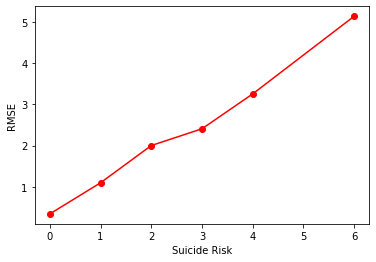

In [13]:
plt.scatter(risks, RMSES_unweighted, color='red')
plt.plot(risks, RMSES_unweighted, color='red')
plt.xlabel("Suicide Risk")
plt.ylabel("RMSE")
plt.show()

### Approach 1: Least Squares Regression

Without weights:

In [14]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train, y_train)
ypred=clf.predict(X_test)

In [15]:
result = mean_squared_error(y_test, ypred, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 0.5208196023569306


In [16]:
RMSES_unweighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_unweighted.append(result)

RMSE (0): 0.21214659789394671
RMSE (1): 0.7061307733011126
RMSE (2): 1.2508505693978986
RMSE (3): 2.0409936378640356
RMSE (4): 3.088389905114704
RMSE (6): 4.941775522773012


With weights:

In [17]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train, y_train, sample_weight=weights_train)
ypred=clf.predict(X_test)

In [18]:
result = mean_squared_error(y_test, ypred, sample_weight=weights_test, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 1.8405128695129125


In [19]:
RMSES_weighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    weights_test_subset = np.take(weights_test.values, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, sample_weight=weights_test_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_weighted.append(result)

RMSE (0): 1.1704871729207997
RMSE (1): 2.413386754864538
RMSE (2): 2.213145319574186
RMSE (3): 1.624272742003826
RMSE (4): 1.7037914592016188
RMSE (6): 2.798829532281996


In [20]:
risks = [0, 1, 2, 3, 4, 6]

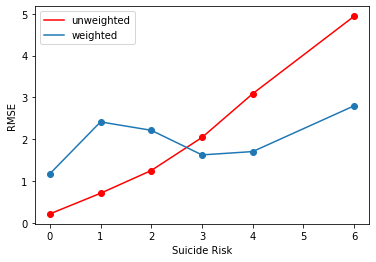

In [21]:
plt.scatter(risks, RMSES_unweighted, color='red')
plt.plot(risks, RMSES_unweighted, color='red')
plt.scatter(risks, RMSES_weighted)
plt.plot(risks, RMSES_weighted)
plt.xlabel("Suicide Risk")
plt.ylabel("RMSE")
plt.legend(['unweighted', 'weighted'])
plt.show()

In [22]:
s = np.sort(abs(clf.coef_))
print('10 most important features:')
for i in range(-1, -11, -1):
    print(df.columns[np.where(abs(clf.coef_) == s[i])][0])
print('\n10 least important features:')
for i in range(10):
    print(df.columns[np.where(abs(clf.coef_) == s[i])][0])

10 most important features:
Any_Drug_Flag
Drug_Not_Marijunana
Marijuana_Only_Flag
predicted_ment_ill
inpatient
psych_distress_yr
Ever_Steal_50
Drug_or_Alc_Past_year
psych_distress_month
EDUCCAT2

10 least important features:
NEWRACE2
Painkiller_Flag
Inhalants_Flag
Alcohol_Flag
IRSEX
Hallcinogens_Flag
RELIG_SERVICES_12month
Tabacco_Flag
outpatient
Meth_Flag


### Approach 2: Ridge Regression

Without weights:

In [23]:
from sklearn.linear_model import Ridge
clf = Ridge().fit(X_train,y_train)
ypred=clf.predict(X_test)

In [24]:
result = mean_squared_error(y_test, ypred, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 0.5208977904996286


In [25]:
RMSES_unweighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_unweighted.append(result)

RMSE (0): 0.21208699410184145
RMSE (1): 0.7065349531765914
RMSE (2): 1.2507892931180111
RMSE (3): 2.0415586270818293
RMSE (4): 3.0892629194899315
RMSE (6): 4.9426250787629264


With weights:

In [26]:
from sklearn.linear_model import Ridge
clf = Ridge().fit(X_train,y_train, weights_train)
ypred=clf.predict(X_test)

In [27]:
result = mean_squared_error(y_test, ypred, sample_weight=weights_test, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 1.8405070522248383


In [28]:
RMSES_weighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    weights_test_subset = np.take(weights_test.values, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, sample_weight=weights_test_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_weighted.append(result)

RMSE (0): 1.1705681356626954
RMSE (1): 2.413421939374536
RMSE (2): 2.213257032202245
RMSE (3): 1.624341909788528
RMSE (4): 1.7036983738221716
RMSE (6): 2.7987268424590006


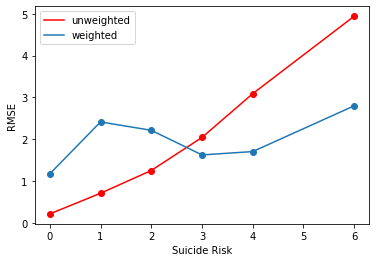

In [29]:
plt.scatter(risks, RMSES_unweighted, color='red')
plt.plot(risks, RMSES_unweighted, color='red')
plt.scatter(risks, RMSES_weighted)
plt.plot(risks, RMSES_weighted)
plt.xlabel("Suicide Risk")
plt.ylabel("RMSE")
plt.legend(['unweighted', 'weighted'])
plt.show()

In [30]:
s = np.sort(abs(clf.coef_))
print('10 most important features:')
for i in range(-1, -11, -1):
    print(df.columns[np.where(abs(clf.coef_) == s[i])][0])
print('\n10 least important features:')
for i in range(10):
    print(df.columns[np.where(abs(clf.coef_) == s[i])][0])

10 most important features:
predicted_ment_ill
inpatient
psych_distress_yr
Ever_Steal_50
Drug_or_Alc_Past_year
psych_distress_month
EDUCCAT2
whodas_score
age
RELIG_IMPORTANT

10 least important features:
Drug_Not_Marijunana
NEWRACE2
Painkiller_Flag
Inhalants_Flag
Alcohol_Flag
IRSEX
Hallcinogens_Flag
RELIG_SERVICES_12month
Tabacco_Flag
outpatient


### Approach 3: LASSO Regression

Without weights:

In [31]:
from sklearn.linear_model import Lasso
clf = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
ypred=clf.predict(X_test)

In [32]:
result = mean_squared_error(y_test, ypred, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 0.6042132246263335


In [33]:
RMSES_unweighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_unweighted.append(result)

RMSE (0): 0.11551414458913335
RMSE (1): 0.8844858554108667
RMSE (2): 1.8844858554108666
RMSE (3): 2.8844858554108668
RMSE (4): 3.8844858554108663
RMSE (6): 5.884485855410867


With weights:

In [34]:
from sklearn.linear_model import Lasso
clf = linear_model.Lasso(alpha=0.1).fit(X_train,y_train, sample_weight=weights_train)
ypred=clf.predict(X_test)

In [35]:
result = mean_squared_error(y_test, ypred, sample_weight=weights_test, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 1.9511187849061082


In [36]:
RMSES_weighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    weights_test_subset = np.take(weights_test.values, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, sample_weight=weights_test_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_weighted.append(result)

RMSE (0): 1.2711875042564755
RMSE (1): 2.2927897116307983
RMSE (2): 1.9850389984672552
RMSE (3): 1.4114924365913968
RMSE (4): 1.6511329660400544
RMSE (6): 3.013250299181827


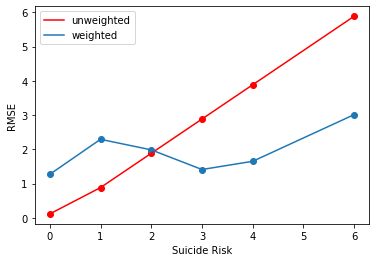

In [37]:
plt.scatter(risks, RMSES_unweighted, color='red')
plt.plot(risks, RMSES_unweighted, color='red')
plt.scatter(risks, RMSES_weighted)
plt.plot(risks, RMSES_weighted)
plt.xlabel("Suicide Risk")
plt.ylabel("RMSE")
plt.legend(['unweighted', 'weighted'])
plt.show()

In [38]:
s = np.sort(abs(clf.coef_))
print('10 most important features:')
for i in range(-1, -11, -1):
    print(df.columns[np.where(abs(clf.coef_) == s[i])][0])
print('\n10 least important features:')
for i in range(10):
    print(df.columns[np.where(abs(clf.coef_) == s[i])][0])

10 most important features:
psych_distress_yr
predicted_ment_ill
psych_distress_month
inpatient
EDUCCAT2
rcvd_any_tmt
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month

10 least important features:
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month
RELIG_SERVICES_12month


### Approach 4: Random Forest Regression

Without weights:

In [39]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
ypred=regr.predict(X_test)

In [40]:
result = mean_squared_error(y_test, ypred, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 0.5253173755241313


In [41]:
RMSES_unweighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_unweighted.append(result)

RMSE (0): 0.19862906533236038
RMSE (1): 0.7507205353038603
RMSE (2): 1.4814549214092927
RMSE (3): 2.116136240645824
RMSE (4): 3.1909404345539256
RMSE (6): 4.996687534828674


With Weights:

In [42]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train, sample_weight=weights_train)
ypred=regr.predict(X_test)

In [43]:
result = mean_squared_error(y_test, ypred, sample_weight=weights_test, squared=False)
print('RMSE (overall):', result)

RMSE (overall): 1.9380613120750672


In [44]:
RMSES_weighted = []
for risk in range(7):
    if risk==5:
        continue
    y_test_subset = np.take(y_test.values, np.where(y_test==risk))[0]
    ypred_subset = np.take(ypred, np.where(y_test==risk))[0]
    weights_test_subset = np.take(weights_test.values, np.where(y_test==risk))[0]
    result = mean_squared_error(y_test_subset, ypred_subset, sample_weight=weights_test_subset, squared=False)
    print('RMSE (' + str(risk) + '):', result)
    RMSES_weighted.append(result)

RMSE (0): 1.2916488032166955
RMSE (1): 2.6054635408030786
RMSE (2): 2.233024355204495
RMSE (3): 1.6197956949898455
RMSE (4): 1.6097119783487261
RMSE (6): 2.8942254743867912


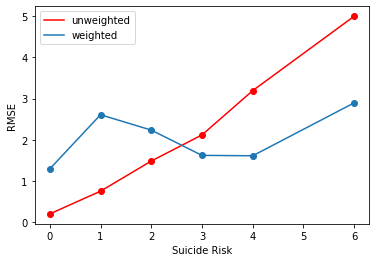

In [45]:
plt.scatter(risks, RMSES_unweighted, color='red')
plt.plot(risks, RMSES_unweighted, color='red')
plt.scatter(risks, RMSES_weighted)
plt.plot(risks, RMSES_weighted)
plt.xlabel("Suicide Risk")
plt.ylabel("RMSE")
plt.legend(['unweighted', 'weighted'])
plt.show()

In [46]:
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

# Prediction Models (Categorical)

Making suicide risk column categorical:

In [ ]:
df = df.astype({'suicide_risk':'int'})

In [ ]:
df

In [ ]:
x_data = df.drop(['suicide_risk'],axis=1)
y_data = df['suicide_risk']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)

In [ ]:
weights = 2**y_train
weights.value_counts()

In [ ]:
test_weights = 2**y_test
test_weights.value_counts()

In [ ]:
class_weights = {0: 1, 2: 4, 3: 8, 4: 16, 6: 64}

### Approach 1: K-Nearest Neighbors
K-Nearest Neighbors classifies based on proximity to k datapoints.

Note: There is a class imbalance. Since most people fall under the first risk category, K-NN is biased toward predicting that class. While it is good to have high accuracy, in the context of suicide risk, predicting 0 risk is not as important as predicting a risk of 2 or higher. 

Some disadvantages of K-NN observed here: doesn’t learn which features useful, computationally expensive, more noisy features → distance less meaningful

k = 5

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result2 = accuracy_score(y_test,ypred)
print('Accuracy (overall):',result2)
result1 = classification_report(y_test, ypred)
print('Classification Report (overall):',)
print (result1)

### Approach 2: Naive Bayes
Naive Bayes assumes independence among features.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train, sample_weight= weights)
ypred=clf.predict(X_test)

In [ ]:
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result2 = accuracy_score(y_test,ypred, sample_weight=test_weights)
print('Accuracy (weighted):',result2)
result1 = classification_report(y_test, ypred, sample_weight=test_weights)
print('Classification Report (weighted):',)
print (result1)

### Approach 3: Ridge Regression Classifier
Regularization: penalization risk for complexity

In [ ]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(X_train,y_train, sample_weight= weights)
ypred=clf.predict(X_test)

alpha = 1

In [ ]:
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result2 = accuracy_score(y_test,ypred, sample_weight=test_weights)
print('Accuracy (weighted):',result2)
result1 = classification_report(y_test, ypred, sample_weight=test_weights)
print('Classification Report (weighted):',)
print (result1)

### Approach 4: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight=class_weights)
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)

max depth = 2

In [ ]:
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result2 = accuracy_score(y_test,ypred, sample_weight=test_weights)
print('Accuracy (weighted):',result2)
result1 = classification_report(y_test, ypred, sample_weight=test_weights)
print('Classification Report (weighted):',)
print (result1)